# Final Project - KM Survival Comparisons

Grace Harrell

In [137]:
#Import relevant libraries
import numpy as np
import pandas as pd
import lifelines as ll
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test
from sksurv.nonparametric import kaplan_meier_estimator
import matplotlib.pyplot as plt

#Import data
kidney_data = pd.read_excel('FinalProject/final_project_clean_data.xlsx')

#Clean and Group data
for col in ('Diabetes', 'Hypertension','Dyslipidemia', 'Primary_events', 'History_of_AMI', 'History_of_stroke', 'All_cause_death', 'Nonfatal_AMI','Nonfatal_stroke'):
    kidney_data[col] = kidney_data[col].astype(bool)
    
grouped_data = kidney_data.groupby('Waiting_time_for_KT')


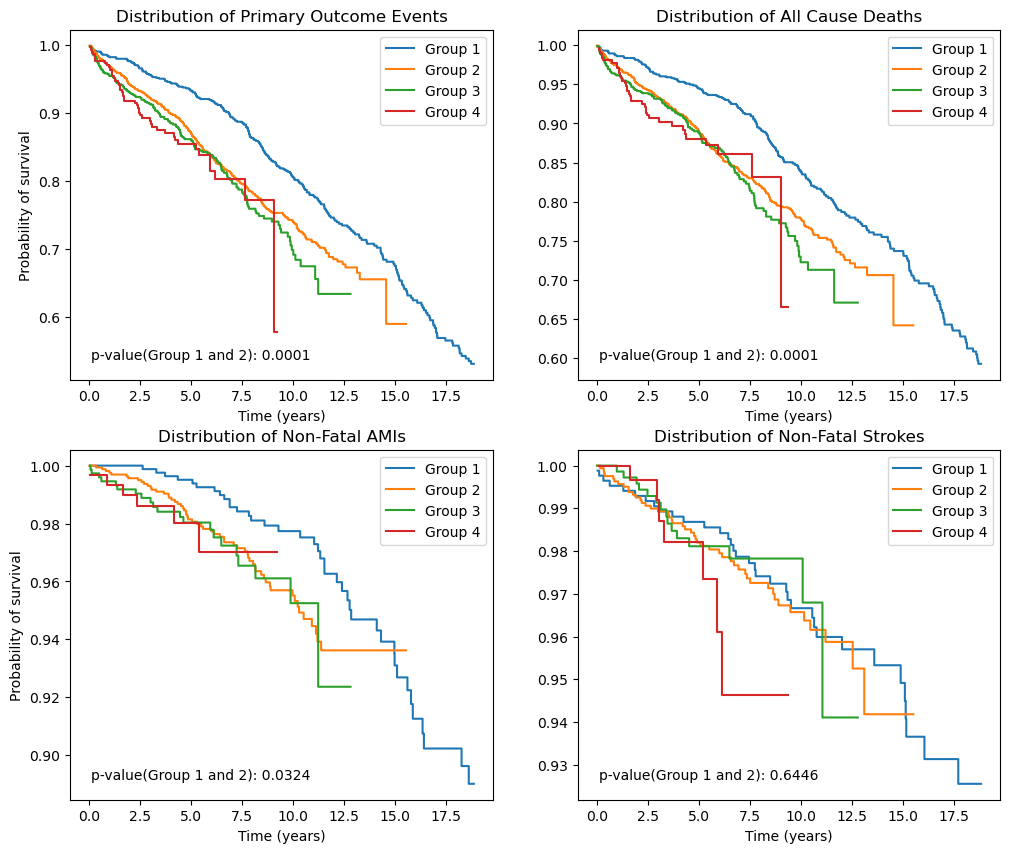

In [183]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# All primary Events
for group_name, group_df in grouped_data:
    time, survival_prob = kaplan_meier_estimator(group_df['Primary_events'], group_df['Primary_events_time'])
    axes[0, 0].step(time, survival_prob, where='post', label=f'Group {group_name + 1}')
    if group_name == 0:
        group0 = group_df
    if group_name == 1:
        group1 = group_df

results = logrank_test(group0['Primary_events_time'], group1['Primary_events_time'], group0['Primary_events'], group1['Primary_events']) 
p_value = results.p_value
axes[0, 0].text(0.05, 0.05, f'p-value(Group 1 and 2): {p_value:.4f}', ha='left', va='bottom', transform=axes[0, 0].transAxes)

axes[0, 0].set_ylabel('Probability of survival')
axes[0, 0].set_xlabel('Time (years)')
axes[0, 0].set_title('Distribution of Primary Outcome Events')

# All cause death
for group_name, group_df in grouped_data:
    time, survival_prob = kaplan_meier_estimator(group_df['All_cause_death'], group_df['All_cause_time'])
    axes[0, 1].step(time, survival_prob, where='post', label=f'Group {group_name + 1}')
    if group_name == 0:
        group0 = group_df
    if group_name == 1:
        group1 = group_df

results = logrank_test(group0['All_cause_time'], group1['All_cause_time'], group0['All_cause_death'], group1['All_cause_death']) 
p_value = results.p_value
axes[0, 1].text(0.05, 0.05, f'p-value(Group 1 and 2): {p_value:.4f}', ha='left', va='bottom', transform=axes[0, 1].transAxes)


axes[0, 1].set_xlabel('Time (years)')
axes[0, 1].set_title('Distribution of All Cause Deaths')

# Non-Fatal AMIs
for group_name, group_df in grouped_data:
    time, survival_prob = kaplan_meier_estimator(group_df['Nonfatal_AMI'], group_df['Nonfatal_AMI_time'])
    axes[1, 0].step(time, survival_prob, where='post', label=f'Group {group_name + 1}')
    if group_name == 0:
        group0 = group_df
    if group_name == 1:
        group1 = group_df

results = logrank_test(group0['Nonfatal_AMI_time'], group1['Nonfatal_AMI_time'], group0['Nonfatal_AMI'], group1['Nonfatal_AMI']) 
p_value = results.p_value
axes[1, 0].text(0.05, 0.05, f'p-value(Group 1 and 2): {p_value:.4f}', ha='left', va='bottom', transform=axes[1, 0].transAxes)


axes[1, 0].set_ylabel('Probability of survival')
axes[1, 0].set_xlabel('Time (years)')
axes[1, 0].set_title('Distribution of Non-Fatal AMIs')

# Non-Fatal Stroke
for group_name, group_df in grouped_data:
    time, survival_prob = kaplan_meier_estimator(group_df['Nonfatal_stroke'], group_df['Nonfatal_stroke_time'])
    axes[1, 1].step(time, survival_prob, where='post', label=f'Group {group_name + 1}')
    if group_name == 0:
        group0 = group_df
    if group_name == 1:
        group1 = group_df
        

results = logrank_test(group0['Nonfatal_stroke_time'], group1['Nonfatal_stroke_time'], group0['Nonfatal_stroke'], group1['Nonfatal_stroke']) 
p_value = results.p_value
    
axes[1, 1].text(0.05, 0.05, f'p-value(Group 1 and 2): {p_value:.4f}', ha='left', va='bottom', transform=axes[1, 1].transAxes)
axes[1, 1].set_xlabel('Time (years)')
axes[1, 1].set_title('Distribution of Non-Fatal Strokes')

for ax in axes.flat:
    ax.legend(loc='best')
    
plt.show()
